ya karena saya pusing ya fren, jadi bikin satu file lagi (:

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p
import matplotlib.image as im
from matplotlib import patches

In [2]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')

df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,28,8,3,2024,PSM Makassar,2,14,3,37,PSS Sleman,1,15,0,31,Batakan,Balikpapan
248,28,8,3,2024,Persik Kediri,4,14,3,43,Rans Nusantara FC,3,14,0,33,Brawijaya,Kediri
249,28,8,3,2024,Bali United FC,2,15,3,48,PSIS Semarang,0,14,0,46,Kapten I Wayan Dipta,Gianyar
250,28,9,3,2024,Persib Bandung,2,14,3,51,Persija Jakarta,1,14,0,35,Si Jalak Harupat,Bandung


In [3]:
# di-run buat keterangan aja
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

# tables at certain gameweek

In [3]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [4]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=28 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ]
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[(((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))) & (df['week']<=pekanke)].shape[0])
    draw.append(df[(((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))) & (df['week']<=pekanke)].shape[0])
    lose.append(df[(((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))) & (df['week']<=pekanke)].shape[0])
    
    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
    except:
        week = len(df.loc[(df['home']==cl)|(df['away']==cl)]['week'])
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==week) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(week)
points

[48, 38, 51, 38, 37, 33, 43, 46, 35, 31, 31, 35, 37, 28, 66, 45, 19, 17]

## home-away pairs

In [5]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
dff

hscore  ascore  hpoint  apoint
home              away                                               
Arema FC          Bali United FC            1       3       0       3
                  Bhayangkara FC            0       0       1       1
                  Borneo FC Samarinda       0       1       0       3
                  Dewa United FC            2       1       3       0
                  Madura United FC          1       1       1       1
...                                       ...     ...     ...     ...
Rans Nusantara FC Persib Bandung            0       4       0       3
                  Persik Kediri             1       0       3       0
                  Persikabo 1973            2       1       3       0
                  Persis Solo               1       2       0       3
                  Persita Tangerang         0       1       0       3

[252 rows x 4 columns]

## tables

In [6]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})

tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,28,20,6,2,48,20,28,66
2,Persib Bandung,28,13,12,3,54,31,23,51
3,Bali United FC,28,14,6,8,45,34,11,48
4,PSIS Semarang,28,13,7,8,42,33,9,46
5,Madura United FC,28,13,6,9,50,43,7,45
6,Persik Kediri,28,12,7,9,47,37,10,43
7,Dewa United FC,28,9,11,8,42,40,2,38
8,Persis Solo,28,10,8,10,42,43,-1,38
9,PSM Makassar,28,9,10,9,34,27,7,37
10,PS Barito Putera,28,9,10,9,40,36,4,37


## sort head-to-head points

In [7]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Played','Won','Drawn','Lost','GF','GA','GD','Points']]
sh.insert(9,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):
    
    try:
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            
            if len(game)==1:
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']

                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                
            if i1scr < i2scr:
                sh.at[i,'pr']=sh['pr'][i]-1
                sh.at[i+1,'pr']=sh['pr'][i+1]+1
                #temp1, temp2 = sh.loc[i].copy(), sh.loc[i+1].copy()
                #sh.loc[i],sh.loc[i+1] = temp2, temp1
        
    except:
        pass
        
sh

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,pr
1,Borneo FC Samarinda,28,20,6,2,48,20,28,66,18
2,Persib Bandung,28,13,12,3,54,31,23,51,17
3,Bali United FC,28,14,6,8,45,34,11,48,16
4,PSIS Semarang,28,13,7,8,42,33,9,46,15
5,Madura United FC,28,13,6,9,50,43,7,45,14
6,Persik Kediri,28,12,7,9,47,37,10,43,13
7,Dewa United FC,28,9,11,8,42,40,2,38,12
8,Persis Solo,28,10,8,10,42,43,-1,38,11
9,PSM Makassar,28,9,10,9,34,27,7,37,10
10,PS Barito Putera,28,9,10,9,40,36,4,37,9


check standings resulted from priority fixing before sort_values command!

In [8]:
sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
sh

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,pr
0,Borneo FC Samarinda,28,20,6,2,48,20,28,66,18
1,Persib Bandung,28,13,12,3,54,31,23,51,17
2,Bali United FC,28,14,6,8,45,34,11,48,16
3,PSIS Semarang,28,13,7,8,42,33,9,46,15
4,Madura United FC,28,13,6,9,50,43,7,45,14
5,Persik Kediri,28,12,7,9,47,37,10,43,13
6,Dewa United FC,28,9,11,8,42,40,2,38,12
7,Persis Solo,28,10,8,10,42,43,-1,38,11
8,PSM Makassar,28,9,10,9,34,27,7,37,10
9,PS Barito Putera,28,9,10,9,40,36,4,37,9


# points earned or lost at

In [9]:
homepoints  = []
awaypoints  = []
totalpoints = []

for cl in sh['Clubs']:
    
    hpe  = df.loc[(df['home']==cl)]['hpoint'].sum()
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    awaypoints.append(ape)
    
    totalpoints.append(hpe+ape)

In [10]:
yep = pd.DataFrame({
    'Club': sh['Clubs'],
    'Home Points': homepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
})
yep

,Club,Home Points,Away Points,Total Points
0,Borneo FC Samarinda,41,25,66
1,Persib Bandung,25,26,51
2,Bali United FC,32,16,48
3,PSIS Semarang,33,13,46
4,Madura United FC,26,19,45
5,Persik Kediri,28,15,43
6,Dewa United FC,24,14,38
7,Persis Solo,30,8,38
8,PSM Makassar,24,13,37
9,PS Barito Putera,28,9,37


In [11]:
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,Away Points,Total Points
1,Borneo FC Samarinda,28,20,6,2,48,20,28,66,41,25,66
2,Persib Bandung,28,13,12,3,54,31,23,51,25,26,51
3,Bali United FC,28,14,6,8,45,34,11,48,32,16,48
4,PSIS Semarang,28,13,7,8,42,33,9,46,33,13,46
5,Madura United FC,28,13,6,9,50,43,7,45,26,19,45
6,Persik Kediri,28,12,7,9,47,37,10,43,28,15,43
7,Dewa United FC,28,9,11,8,42,40,2,38,24,14,38
8,Persis Solo,28,10,8,10,42,43,-1,38,30,8,38
9,PSM Makassar,28,9,10,9,34,27,7,37,24,13,37
10,PS Barito Putera,28,9,10,9,40,36,4,37,28,9,37


Text(0, 19.2, 'source: Liga Indonesia Baru')

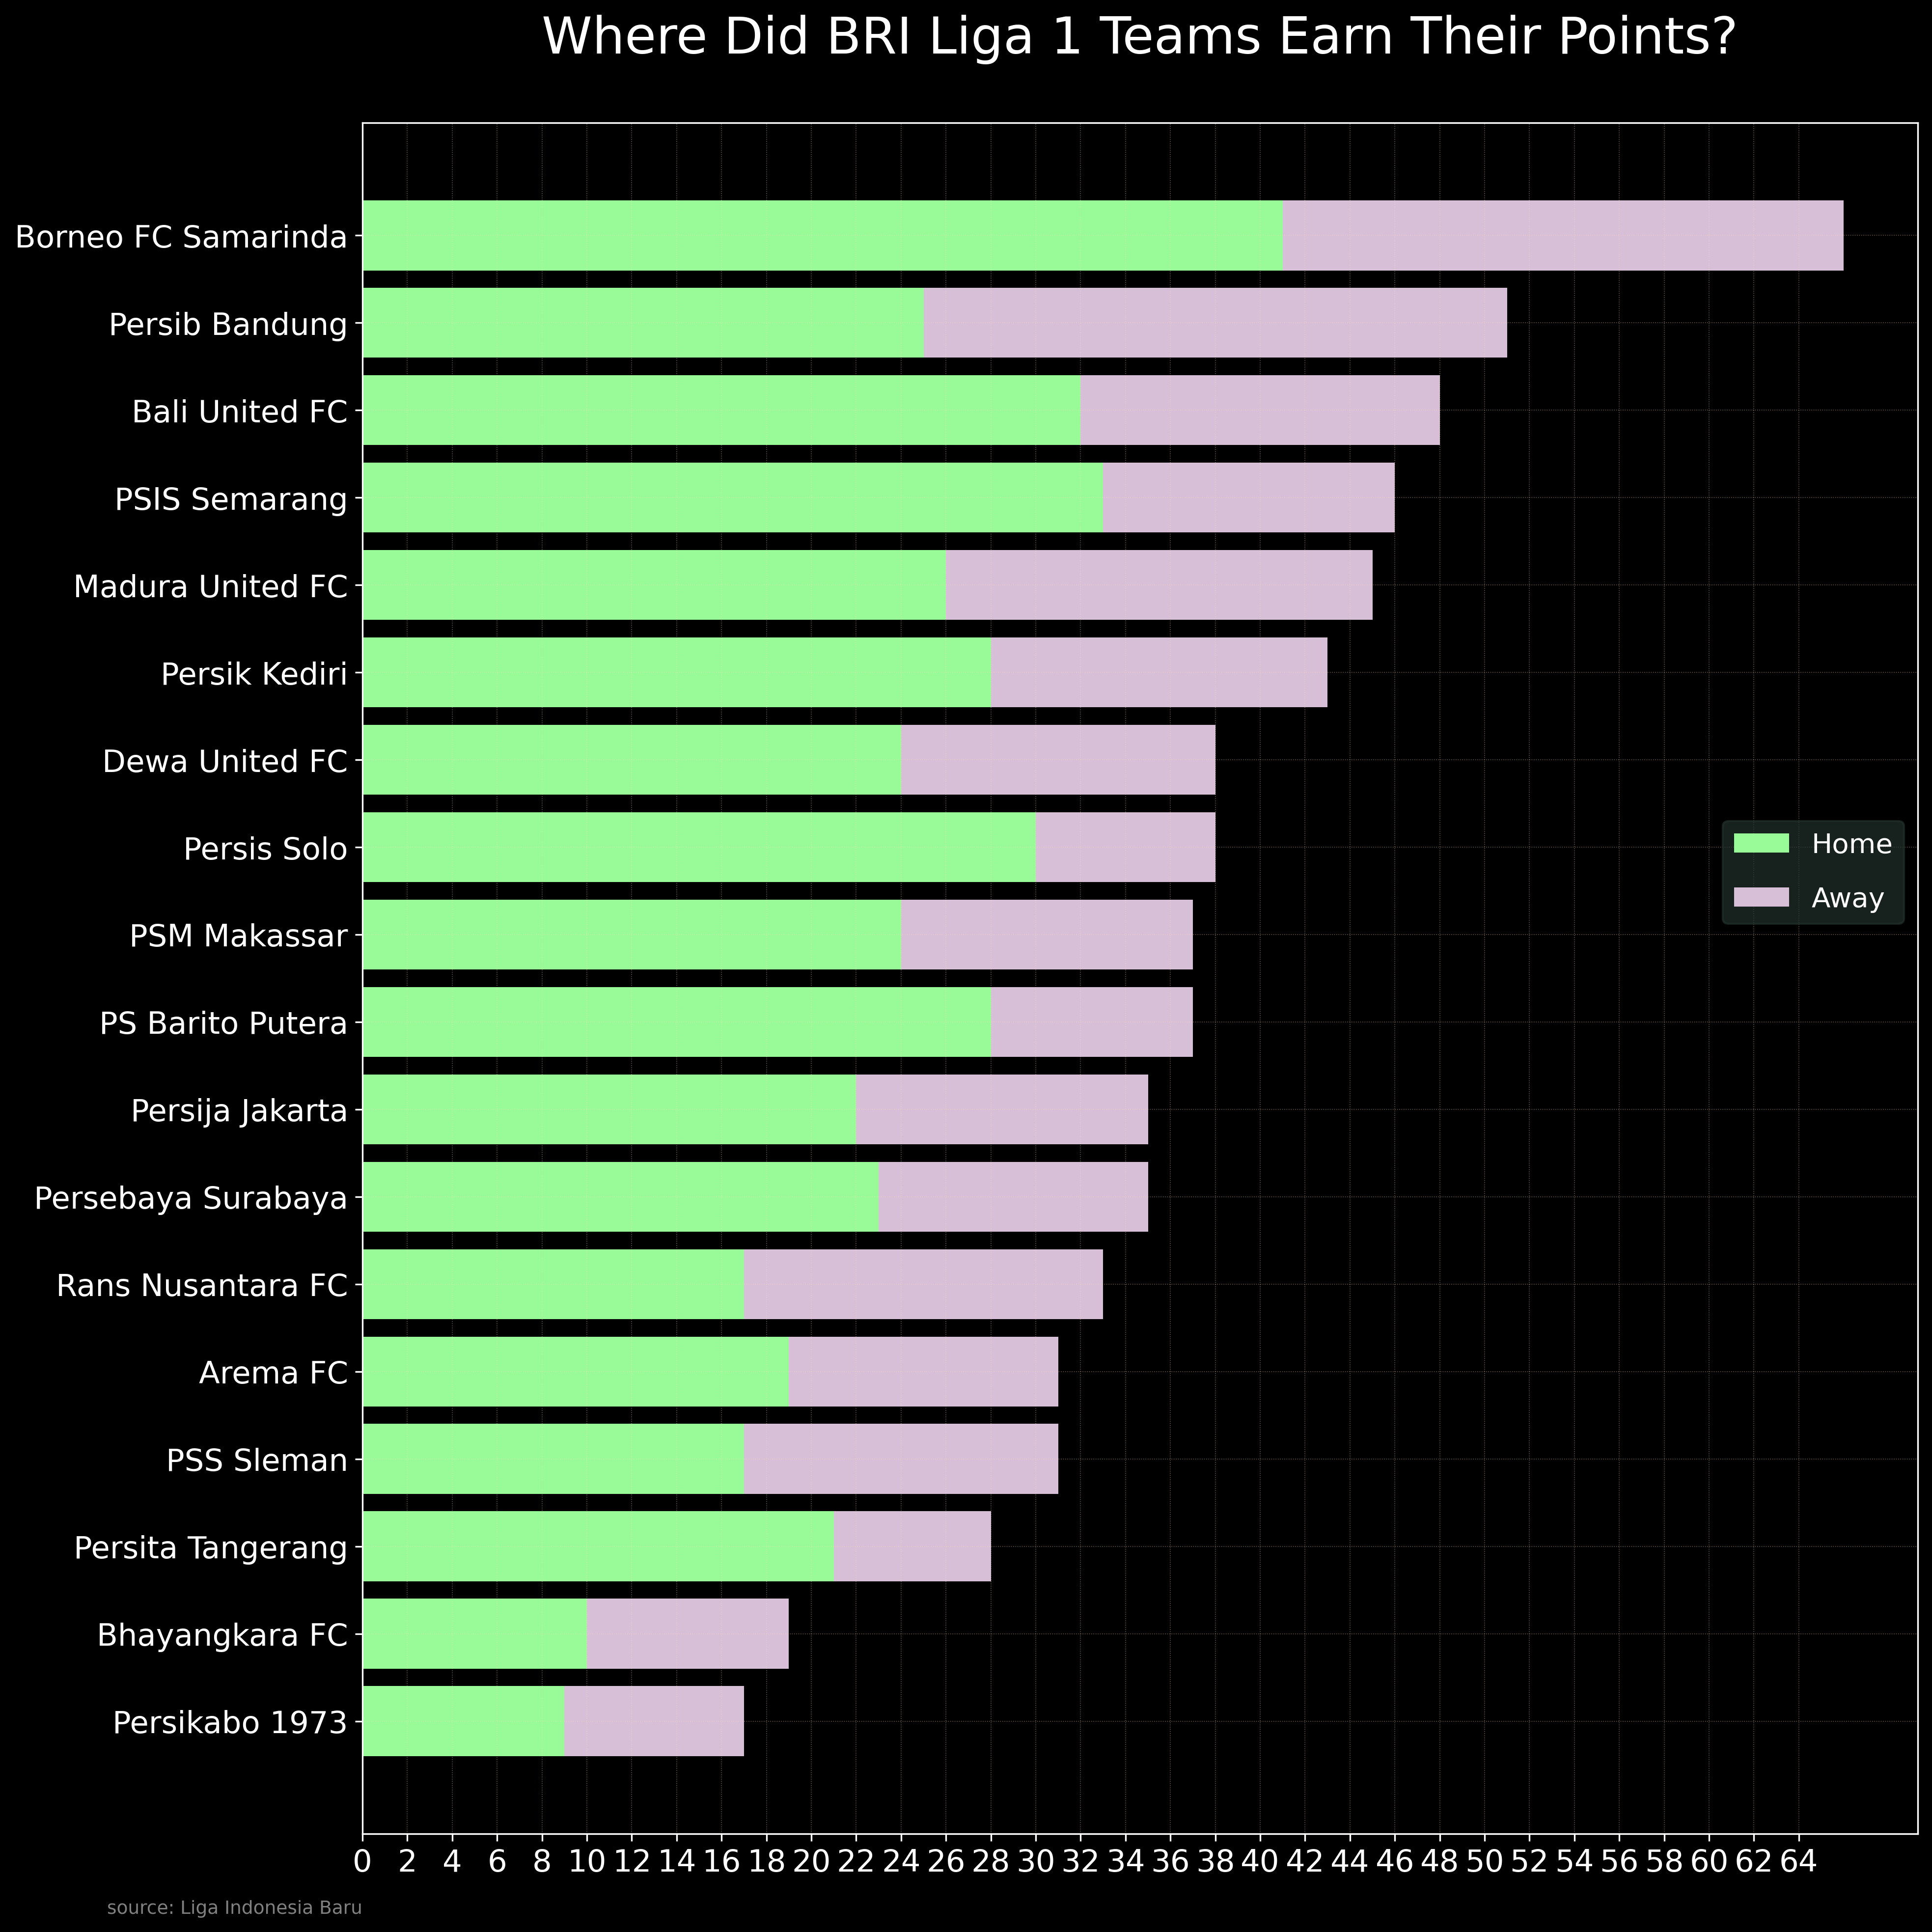

In [12]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, yep['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, yep['Away Points'], left=yep['Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')


## standings breakdown

In [13]:
def earnfrom (syrt):
    point=syrt.sum()
    width=syrt.count()*3
    return(point,width)

In [14]:
dct={'club':merg['Clubs'].values.tolist(), 
     'home':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))],
     'away':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))]}

for ii, cl in zip (range(len(merg['Clubs'])), dct['club']):
    
    for i in (1, 2, 3):
        hmask=(df['home']==cl) & (df['away'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)]))
        amask=(df['away']==cl) & (df['home'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)]))
        mask=df.loc[hmask|amask]
    
        hpefr, hpewdt = earnfrom(mask.loc[(mask['home']==cl)]['hpoint'])
        apefr, apewdt = earnfrom(mask.loc[(mask['away']==cl)]['apoint'])
    
        for j, jj, jjj in zip (list(dct.keys())[1:], [hpefr,apefr], [hpewdt,apewdt]):
            dct[j][ii]['point'].insert(i,jj)
            dct[j][ii]['width'].insert(i,jjj)

dct

{'club': ['Borneo FC Samarinda',
  'Persib Bandung',
  'Bali United FC',
  'PSIS Semarang',
  'Madura United FC',
  'Persik Kediri',
  'Dewa United FC',
  'Persis Solo',
  'PSM Makassar',
  'PS Barito Putera',
  'Persija Jakarta',
  'Persebaya Surabaya',
  'Rans Nusantara FC',
  'Arema FC',
  'PSS Sleman',
  'Persita Tangerang',
  'Bhayangkara FC',
  'Persikabo 1973'],
 'home': [{'point': [10, 18, 13], 'width': [12, 18, 15]},
  {'point': [5, 7, 13], 'width': [12, 15, 15]},
  {'point': [8, 15, 9], 'width': [15, 15, 15]},
  {'point': [8, 13, 12], 'width': [15, 15, 12]},
  {'point': [6, 12, 8], 'width': [15, 15, 12]},
  {'point': [8, 11, 9], 'width': [15, 18, 9]},
  {'point': [4, 7, 13], 'width': [12, 15, 15]},
  {'point': [18, 7, 5], 'width': [18, 15, 9]},
  {'point': [4, 7, 13], 'width': [12, 15, 15]},
  {'point': [8, 9, 11], 'width': [15, 9, 15]},
  {'point': [3, 8, 11], 'width': [12, 12, 18]},
  {'point': [4, 6, 13], 'width': [9, 12, 18]},
  {'point': [9, 3, 5], 'width': [15, 12, 15]}

In [15]:
layout = [#["logo"] + ["club"] * 2,
          ["text"] * 3,
          ["pos"] + ["hbar"] + ["abar"],
          ["pos"] + ["hbar"] + ["abar"]]

Text(0.5, 0.98, '\nHow Did BRI Liga 1 Teams Earn Their Points?')

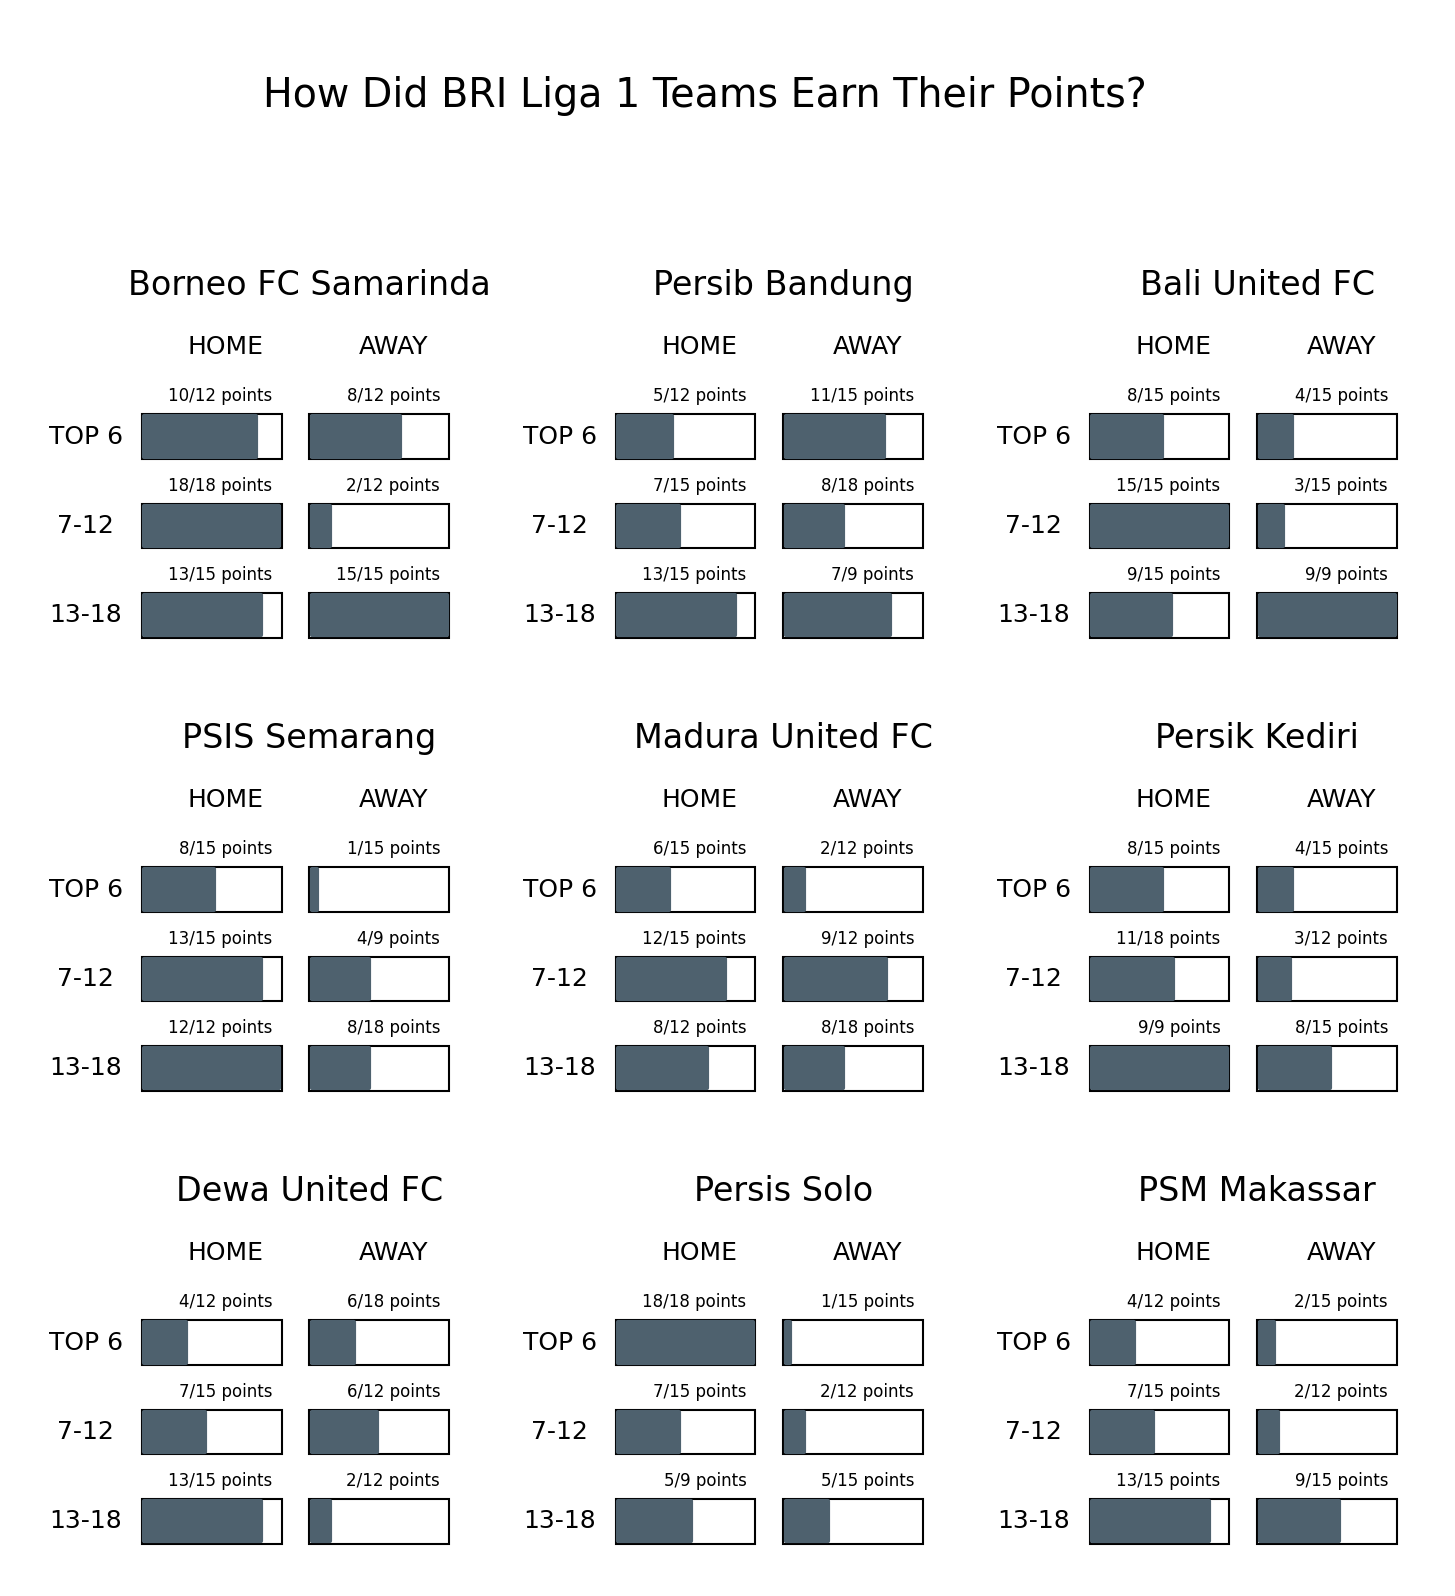

In [16]:
fig, ax = p.subplots(3,3,figsize = (6,6), dpi=300)

p.setp(ax, xlim=(0, 1), ylim=(0, 1))
p.subplots_adjust(wspace=.06, hspace=0)

for axn, cl in zip (ax.flat, range(len(dct['club'][:9]))):
    
    axn.annotate(xy = (5/8,4/5), text = dct['club'][cl], ha = 'center', va = 'bottom', size = 8)
    axn.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)

    axn.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)
    
    for i, j in zip ([.45,.25,.05], [0,1,2]):
        
        for ix, venue in zip ([1/4,5/8],['home', 'away']):
            axn.add_patch(patches.Rectangle((ix, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
            if dct[venue][cl]['point'][j] != 0:
                axn.fill_between(x = [ix+.005, ix+(5/16)*dct[venue][cl]['point'][j]/dct[venue][cl]['width'][j]-.005], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
            axn.annotate(xy = ((ix+5/16-.02), (i+.12)), text = str(dct[venue][cl]['point'][j])+'/'+str(dct[venue][cl]['width'][j])+' points', ha = 'right', va = 'bottom', size = 4)

    axn.set(adjustable='box', aspect='equal')
    axn.axis('off')
    
fig.suptitle("\nHow Did BRI Liga 1 Teams Earn Their Points?", size=9.5)

Text(0.5, 0.98, '\nHow Did BRI Liga 1 Teams Earn Their Points?')

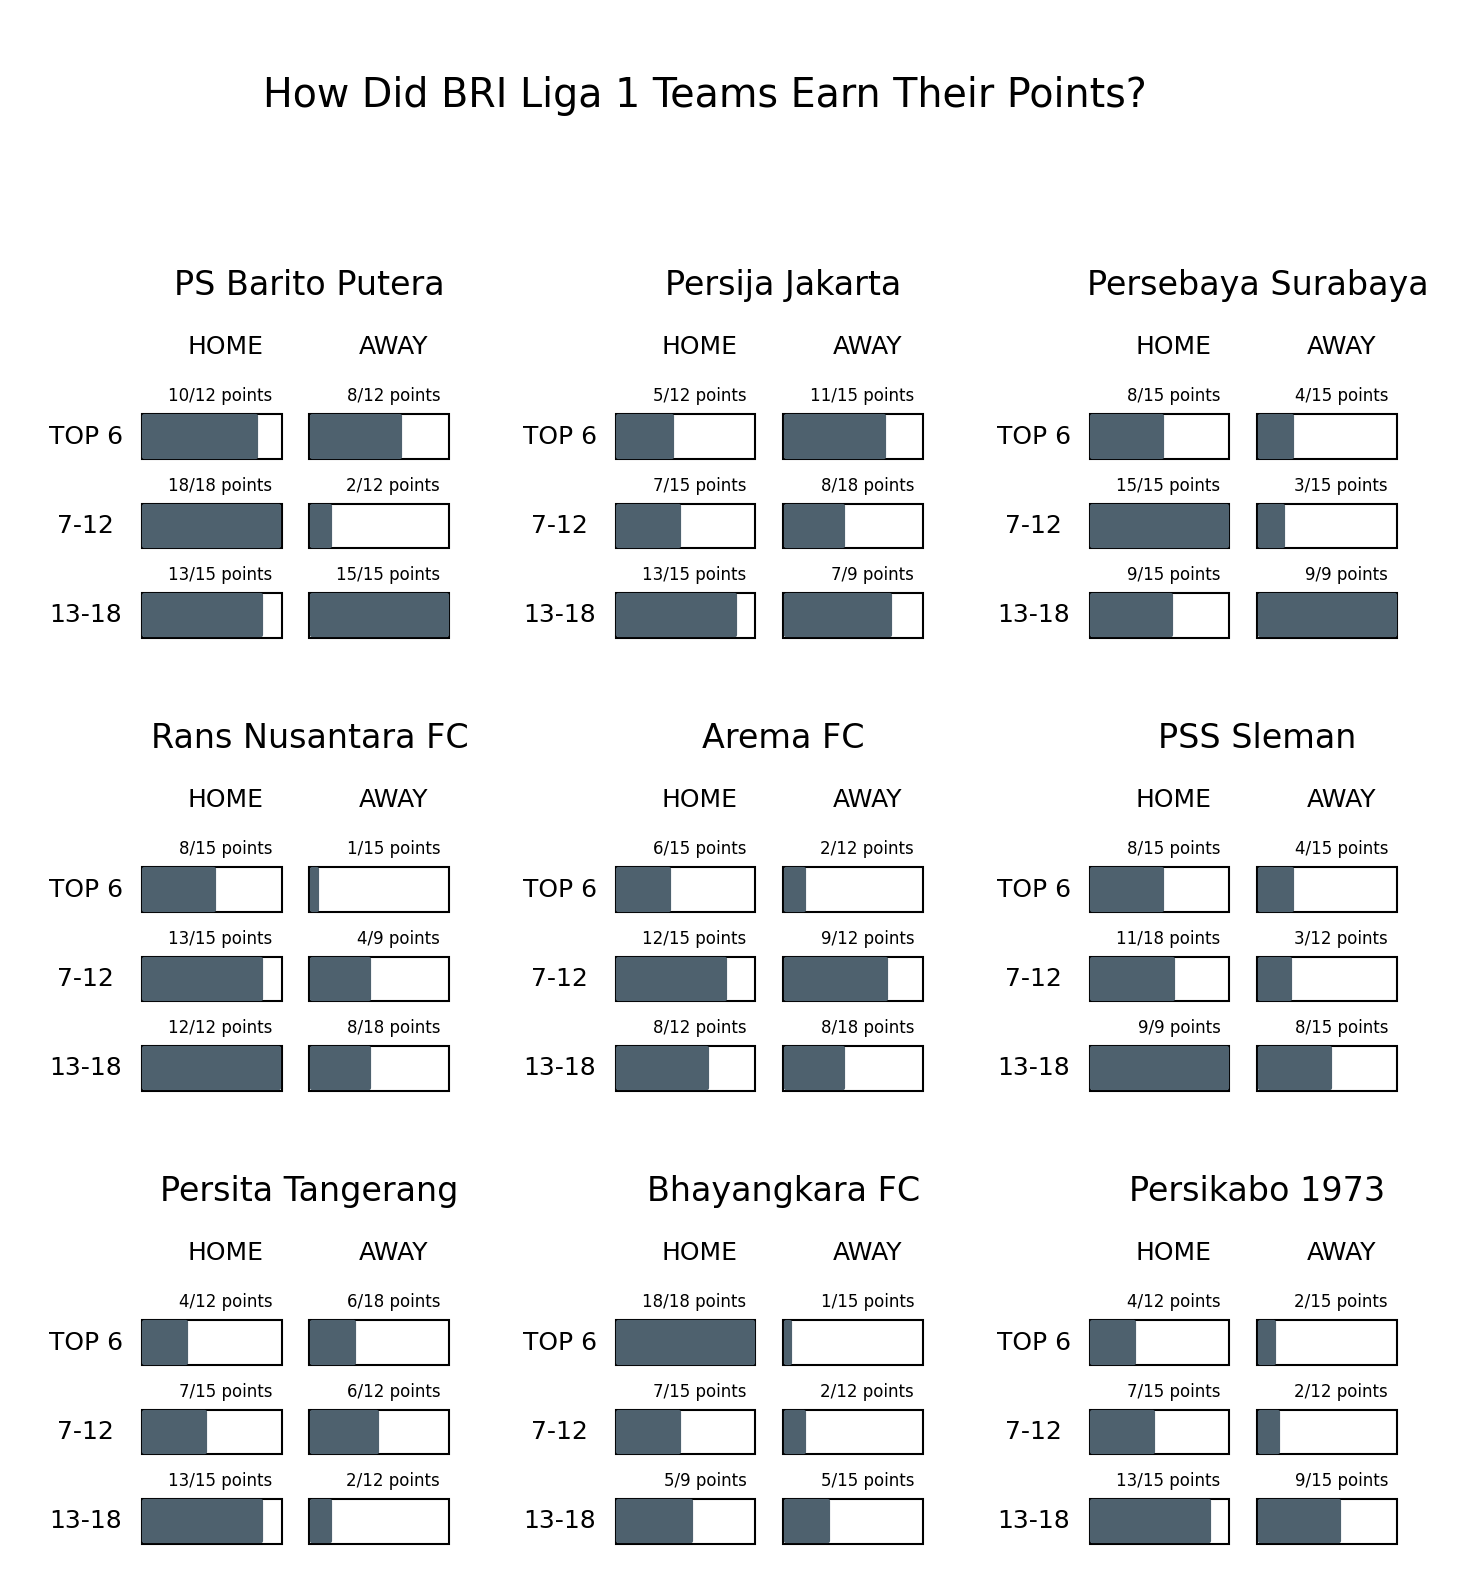

In [15]:
fig, ax = p.subplots(3,3,figsize = (6,6), dpi=300)

p.setp(ax, xlim=(0, 1), ylim=(0, 1))
p.subplots_adjust(wspace=.06, hspace=0)

for axn, cl in zip (ax.flat, range(len(dct['club'][9:]))):
    
    axn.annotate(xy = (5/8,4/5), text = dct['club'][cl+9], ha = 'center', va = 'bottom', size = 8)
    axn.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)

    axn.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)
    
    for i, j in zip ([.45,.25,.05], [0,1,2]):
        
        for ix, venue in zip ([1/4,5/8],['home', 'away']):
            axn.add_patch(patches.Rectangle((ix, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
            if dct[venue][cl]['point'][j] != 0:
                axn.fill_between(x = [ix+.005, ix+(5/16)*dct[venue][cl]['point'][j]/dct[venue][cl]['width'][j]-.005], y1 = i+.005, y2 = i+.1-.005, color = '#4e616e')
            axn.annotate(xy = ((ix+5/16-.02), (i+.12)), text = str(dct[venue][cl]['point'][j])+'/'+str(dct[venue][cl]['width'][j])+' points', ha = 'right', va = 'bottom', size = 4)

    axn.set(adjustable='box', aspect='equal')
    axn.axis('off')
    
fig.suptitle("\nHow Did BRI Liga 1 Teams Earn Their Points?", size=9.5)